In [54]:
def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    from scipy import signal
    import matplotlib.pyplot as plt
    plt.acorr(
    x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

In [23]:
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import random

#target distribution
def t(x,mu1,mu2,sigma1,sigma2):
    return (1/(sigma1*math.sqrt(2*math.pi)))*math.exp(-((x-mu1)**2)/(2*sigma1**2)) + (1/(sigma2*math.sqrt(2*math.pi)))*math.exp(-((x-mu2)**2)/(2*sigma2**2))

t(5,-4,4,0.5,1)



0.24197072451914337

In [52]:
def metroplis_algorithm(eps):
    x0 = 5
    xs = [x0]
    for i in range(100000):
        x = numpy.random.normal(loc=x0, scale=eps)
        if random.uniform(0,1) < min(1, t(x,-4,4,0.5,1)/t(x0,-4,4,0.5,1)):
            x0 = x
        if i%100 == 0 and i != 0:
            xs.append(x0)
    proposal_color = "#1f77b4"
    plt.figure(figsize=(12, 6))
    plot_x = np.linspace(-6, 8, 500)
    plot_y = sts.norm(-4, 0.5).pdf(plot_x)+sts.norm(4, 1).pdf(plot_x)
    plt.plot(plot_x, plot_y, '-', color=proposal_color)
    plt.title('Proposal distribution: N(x | –4, 0.5 ) + N(x | 4, 1 )')
    plt.hist(xs,density=True, bins=30)
    plt.show()
    plt.figure(figsize=(12, 6))
    plot_acf(xs)
    plt.show()

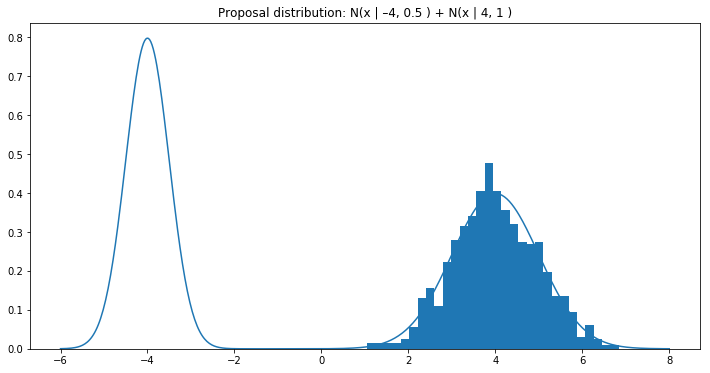

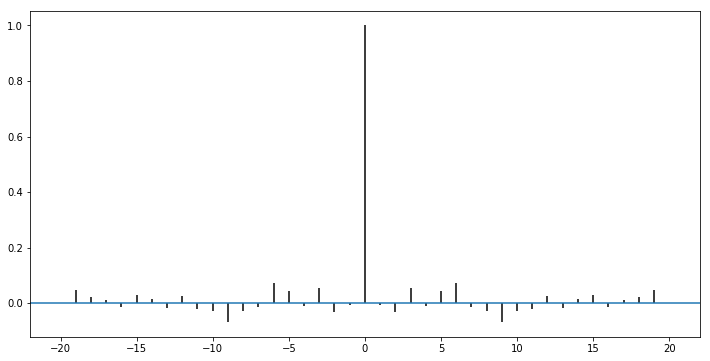

In [55]:
#eps 0.5
metroplis_algorithm(0.5)

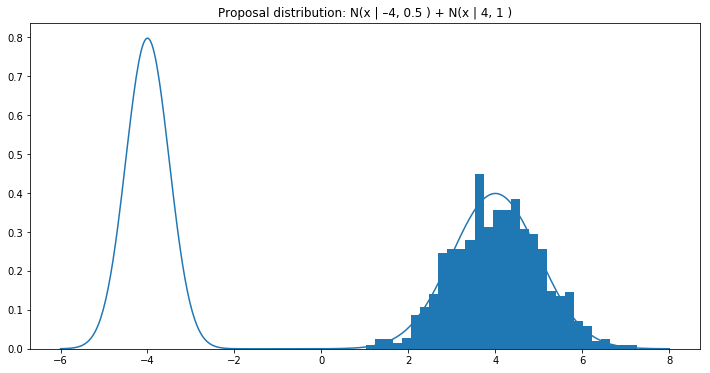

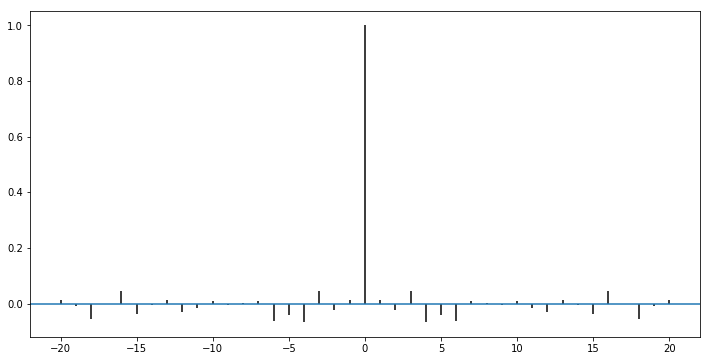

In [56]:
#eps 1
metroplis_algorithm(1)

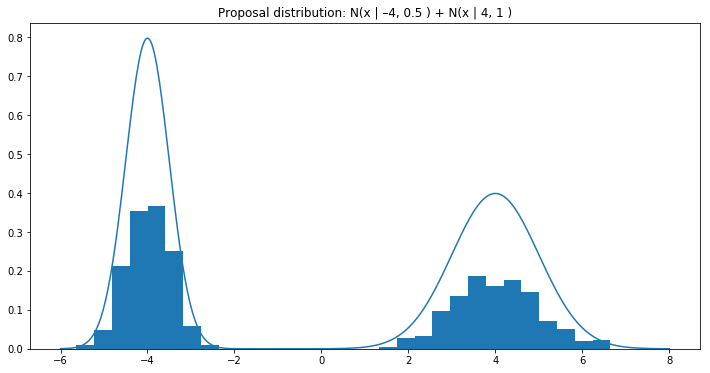

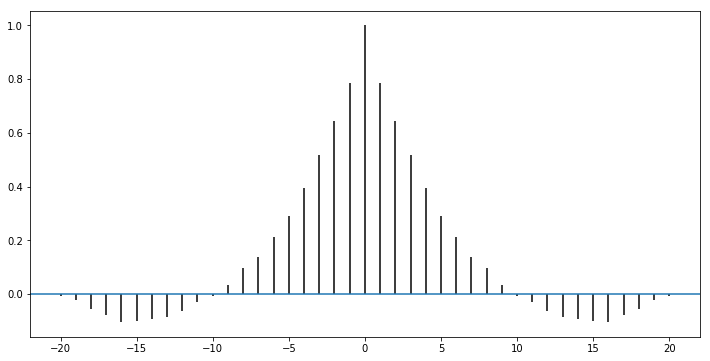

In [57]:
#eps 2
metroplis_algorithm(2)

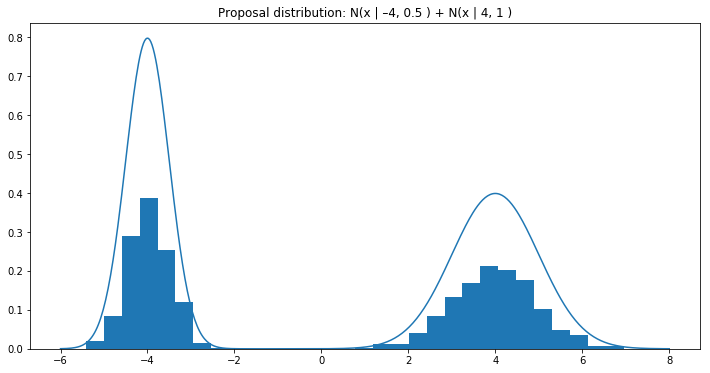

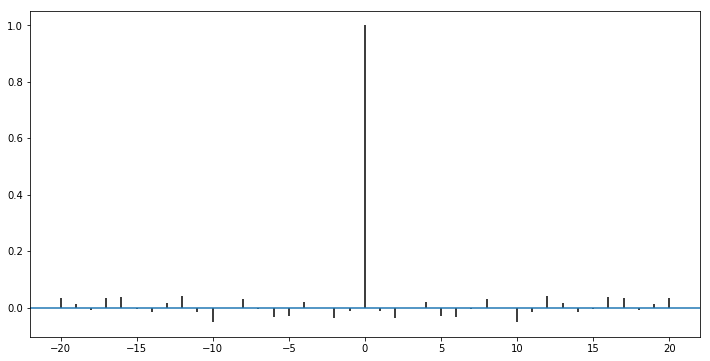

In [58]:
#eps 4
metroplis_algorithm(4)

Based on the produced plots, the most optimal value of epsilon is 4 - we can see that in that case the samples seem to represent the target distrbuton and the autocorrelation values seem to be pretty small for all values except for 0. 